# Crime Analysis 2005-2015

### Analyst: Ralph Jordan Zapitan 
In this analysis, I will be analyzing a particular data set about all crimes documented by police between years 2005 and 2015. 

Because most variables in the data set are categorical in nature, a bar plot will be the most useful type of plot in this case. Therefore, every new table that I generate will be accompanied by its corresponding bar plot to present the readers a proper data visualization. 

I will attempt to analyze as many variables in the data as possible. I will be using the Python and the Pandas module, which is a powerful tool used by data scientists to analyze big data, and Seaborn, a very powerful data visualization tool based on Matplotlib.

The data set used in this analysis belongs to Kevin Markham, a data scientist and a teacher, and founder of Data School. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## The Data Set 
Let us import the data set using the link below and take a look at the first three rows to get an idea of what the data looks like.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2018-tutorial/master/police.csv')
df[:3]

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Now let us look at the size and shape of the data.

In [8]:
df.shape

(91741, 15)

So there are 91741 rows and 15 columns. This is a pretty small data set as far as data science is concerned. Let us check the data types of each column.

In [9]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

## Removing Unnecessary Variables
Probably the last step that we need to do before we start analyzing the data is to check if there is any column in the data that contains nothing but missing values, because if a column consists of missing values only from top to bottom, then that column has no business even being there. But how do we do it? First, let us see how many missing values each column has.

In [10]:
df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

As we saw earlier, the data set contains $ 91741 $ rows and $ 15 $ columns. If we observe the "county_name" column, it has $ 91741 $ missing values, which is equal to the number of rows of the data frame. We should remove this column. However, what if we had more than $ 15 $, columns, say at least a hundred, and any of those $ 100 $ columns could contain nothing but missing values? With at least a hundred columns, it would be slightly more difficult to eyeball which columns have the same number of missing values as the number of rows of the data frame. With this being said, the smartest way to get rid of multiple columns is to write a loop. The following code should accomplish that.

In [11]:
for i in df.columns:
    if df[i].isna().sum() == len(df):
        df.drop(i, axis = 1, inplace = True)
df[:3]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


If we observe the new data frame, the "county_name" column has been dropped out of the data set, as well as every other columns containing only missing values. Now that we have removed unnecessary garbages, let us begin with our objective.

## Which gender gets stopped more often?
I want to know if Males or Females are more likely to get stopped to matter the type of violation.

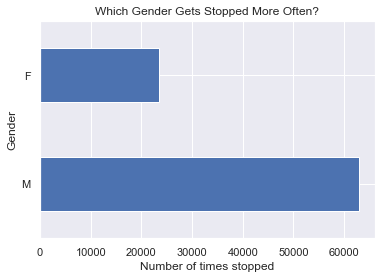

M    72.79%
F    27.21%
Name: driver_gender, dtype: object

In [19]:
df.driver_gender.value_counts().plot(kind = 'barh').set_title('Which Gender Gets Stopped More Often?')
plt.ylabel('Gender')
plt.xlabel('Number of times stopped')
plt.show()
df.driver_gender.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

Conclusion: For any type of violation, Males are always more likely to get stopped by police with probability $ 72.79 $ percent while Females are stopped only $ 27.21 $ percent every time.

## Which gender speeds more?
If we want to be more specific with the type of violation by looking at only Speeders, we can filter our data frame as follows.

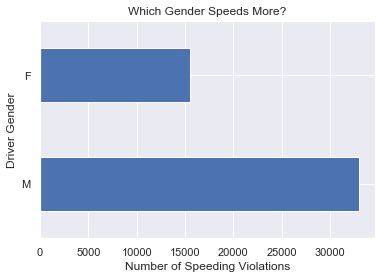

M    68.05%
F    31.95%
Name: driver_gender, dtype: object

In [27]:
df.loc[df.violation == 'Speeding', :].driver_gender.value_counts().plot(kind = 'barh').set_title('Which Gender Speeds More?')
plt.xlabel('Number of Speeding Violations')
plt.ylabel('Driver Gender')
plt.show()
df.loc[df.violation == 'Speeding', :].driver_gender.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

As expected, Males are more likely to get pulled over by police for speeding than Females are. 

## Which race is stopped more often?
Without being specific about the type of violation, which race is stopped more often than others?

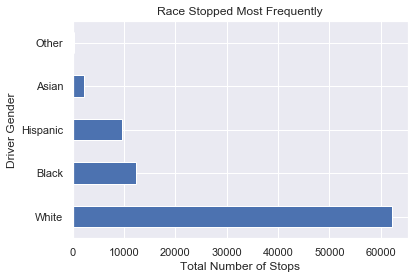

White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64

In [51]:
df.driver_race.value_counts().plot(kind = 'barh').set_title('Race Stopped Most Frequently')
plt.xlabel('Total Number of Stops')
plt.ylabel('Driver Gender')
plt.show()
df.driver_race.value_counts()

## For each race, which gender is stopped more often for any kind of violation?

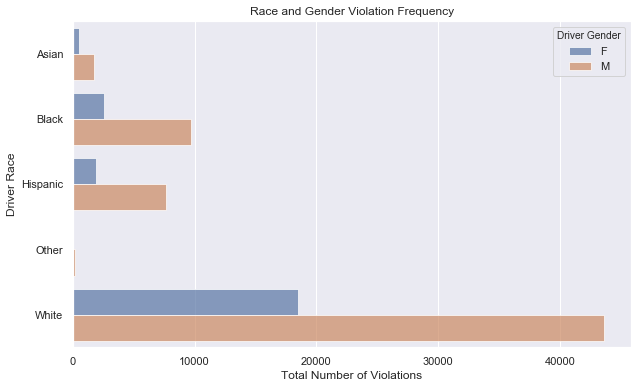

Total Number of Violations
Driver Race Driver Gender                            
Asian       F                                     513
            M                                    1746
Black       F                                    2580
            M                                    9664
Hispanic    F                                    1871
            M                                    7636
Other       F                                      26
            M                                     214
White       F                                   18521
            M                                   43635

In [73]:
pivot = df.pivot_table(index = ['driver_race', 'driver_gender'], values = 'violation', aggfunc = 'count').reset_index().rename(
columns = {'driver_race': 'Driver Race', 'driver_gender': 'Driver Gender', 'violation': 'Total Number of Violations'})
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Total Number of Violations', y = 'Driver Race', hue = 'Driver Gender', data = pivot, alpha = 0.7).set_title('Race and Gender Violation Frequency')
plt.show()
pivot.set_index(['Driver Race', 'Driver Gender'])

Again, Females are shown to be much less likely to commit any violation and therefore much less likely to get pulled over than Males.

## Is the probability of getting searched during a stop affected by gender?
We want to know if gender matters when avoiding getting searched.

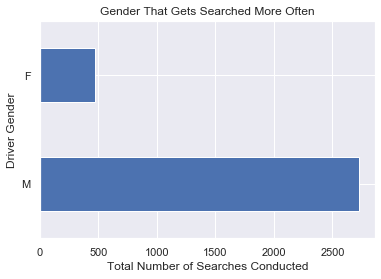

M    85.26%
F    14.74%
Name: driver_gender, dtype: object

In [87]:
df.loc[df.search_conducted == True, :].driver_gender.value_counts().plot(kind = 'barh').set_title('Gender That Gets Searched More Often')
plt.xlabel('Total Number of Searches Conducted')
plt.ylabel('Driver Gender')
plt.show()
df.loc[df.search_conducted == True, :].driver_gender.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

This is a pretty big difference. We don't want to make any uneducated guesses or assumptions of why Females are way less likely to get searched during a stop. Personally, if I were to make an educated guess, I would say it's probably due to the fact that females behave more appriopriately than males, at least when they know someone's watching.

## Which race is searched more often during a stop?

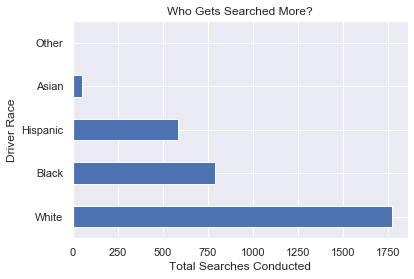

White       55.32%
Black       24.72%
Hispanic    18.27%
Asian         1.6%
Other        0.09%
Name: driver_race, dtype: object

In [94]:
df.loc[df.search_conducted == True, :].driver_race.value_counts().plot(kind = 'barh').set_title('Who Gets Searched More?')
plt.ylabel('Driver Race')
plt.xlabel('Total Searches Conducted')
plt.show()
df.loc[df.search_conducted == True, :].driver_race.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

## Which race is stopped most frequently for drugs?

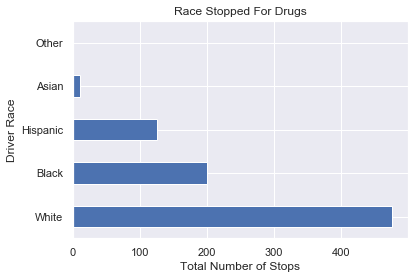

White        58.4%
Black       24.66%
Hispanic    15.46%
Asian        1.35%
Other        0.12%
Name: driver_race, dtype: object

In [127]:
df.loc[df.drugs_related_stop == True, :].driver_race.value_counts().plot(kind = 'barh').set_title('Race Stopped For Drugs')
plt.ylabel('Driver Race')
plt.xlabel('Total Number of Stops')
plt.show()
df.loc[df.drugs_related_stop == True, :].driver_race.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

## What is the probability of the driver getting frisked during a search?
I am going to add a new column to the data frame called 'Frisked' and view the first three rows of the new data frame.

In [150]:
df['Frisked'] = df.search_type.str.contains('Frisk', case = False)
df[:3]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisked
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


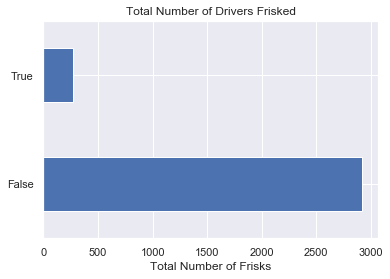

,Frisked
False,91.43%
True,8.57%


In [161]:
df.Frisked.value_counts().plot(kind = 'barh').set_title('Total Number of Drivers Frisked')
plt.xlabel('Total Number of Frisks')
plt.show()
pd.DataFrame(df.Frisked.value_counts(normalize = True).mul(100).round(2).astype(str) + '%')

## Which year had the least number of stops?

In [167]:
df['stop_datetime'] = pd.to_datetime(df.stop_date + ' ' + df.stop_time)
df['hour'] = df.stop_datetime.dt.hour
df['year'] = df.stop_datetime.dt.year
df['month'] = df.stop_datetime.dt.month
night = [20, 21, 22, 23, 0, 1, 2, 3 ,4, 5]
def isnight(x):
    if x in night:
        return 'Night'
    else:
        return 'Day'
df['is_night'] = df.hour.apply(isnight)
df[:3]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisked,stop_datetime,hour,year,month,is_night
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,1,2005,1,Night
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8,2005,1,Day
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,23,2005,1,Night


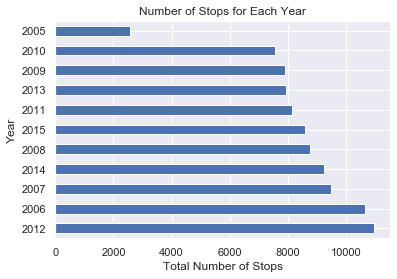

,Total Number of Stops
Year,
2012,10970
2006,10639
2007,9476
2014,9228
2008,8752
2015,8599
2011,8126
2013,7924
2009,7908


In [178]:
df.year.value_counts().plot(kind = 'barh').set_title('Number of Stops for Each Year')
plt.ylabel('Year')
plt.xlabel('Total Number of Stops')
plt.show()
pd.DataFrame(df.year.value_counts()).rename(columns = {'year': 'Total Number of Stops'}).reset_index().rename(columns = {'index': 'Year'}).set_index('Year')

Year 2005 had the least number of stops, while 2012 had the highest number of stops.

## What time of day do most stops occur?

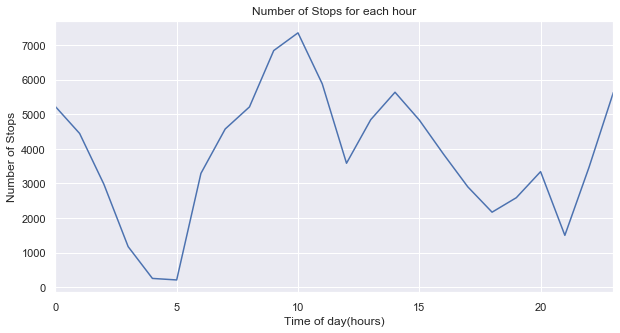

,Total Number of Stops
Hour of Day,
10,7350
9,6838
11,5877
14,5634
23,5629
0,5221
8,5210
13,4842
15,4832


In [190]:
plt.figure(figsize = (10, 5))
df.hour.value_counts().sort_index().plot().set_title(
'Number of Stops for each hour')
plt.xlabel('Time of day(hours)')
plt.ylabel('Number of Stops')
plt.show()
pd.DataFrame(df.hour.value_counts()).reset_index().rename(columns = {'index': 'Hour of Day', 'hour': 'Total Number of Stops'}).set_index('Hour of Day')

Most stops happen during the day. The highest number of stops occur at 10:00 AM and the least number of stops occur at 5:00 AM.

## What times of days do most drivers get busted for drugs?

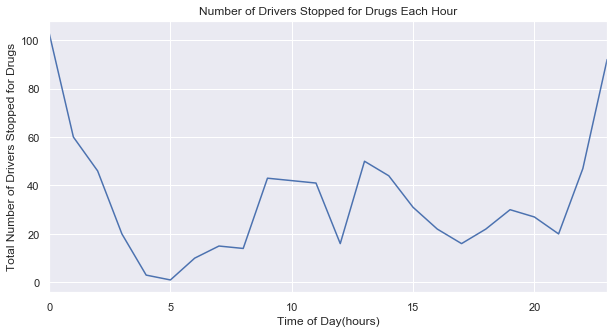

,Number of Drivers with Drugs
Hour of Day,
0,103
23,92
1,60
13,50
22,47
2,46
14,44
9,43
10,42


In [207]:
plt.figure(figsize = (10, 5))
df.loc[df.drugs_related_stop == True, :].hour.value_counts().sort_index().plot().set_title(
'Number of Drivers Stopped for Drugs Each Hour')
plt.xlabel('Time of Day(hours)')
plt.ylabel('Total Number of Drivers Stopped for Drugs')
plt.show()
pd.DataFrame(df.loc[df.drugs_related_stop == True, :].hour.value_counts()).reset_index().rename(
columns = {'index': 'Hour of Day', 'hour': 'Number of Drivers with Drugs'}).set_index('Hour of Day')

As the time plot suggests, numbers of drug activities among drivers are highest while it's dark. The highest number of drivers pulled over for drugs occur at around 12 midnight, followed by 11:00 PM, and so on. 

This is very important to know. If you work at a police department as a Crime Analyst, this information will help the police predict what times of days they should patrol the streets for people possessing drugs.

## Whether drugs are present or not, how does drug activities vary by time of day?

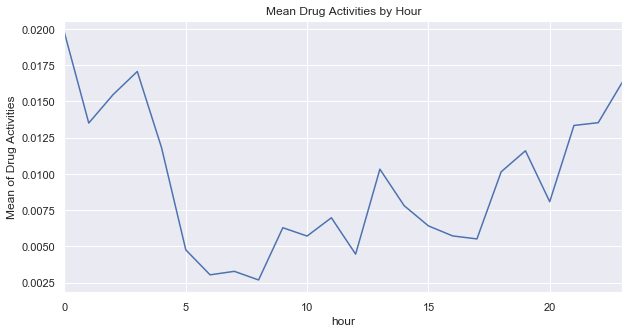

,Mean Drugs Related Stop
hour,
0,1.97%
3,1.71%
23,1.63%
2,1.55%
22,1.35%
1,1.35%
21,1.33%
4,1.18%
19,1.16%


In [227]:
plt.figure(figsize = (10, 5))
df.groupby('hour').drugs_related_stop.mean().plot().set_title('Mean Drug Activities by Hour')
plt.ylabel('Mean of Drug Activities')
plt.show()
pd.DataFrame(df.groupby('hour').drugs_related_stop.mean().sort_values(ascending = False).mul(100).round(2).astype(str) + '%').rename(
columns = {'drugs_related_stop': 'Mean Drugs Related Stop'})

## Drug related stops by time of day for each race.

This looks almost similar to the previous plot.

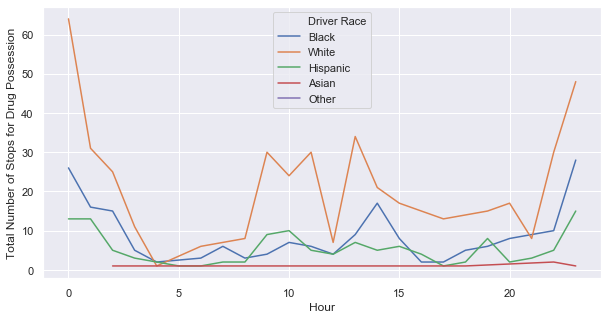

In [250]:
pivot = df.loc[df.drugs_related_stop == True, :].pivot_table(index = ['driver_race', 'hour'], values = 'violation', aggfunc = 'count').reset_index().rename(
columns = {'driver_race': 'Driver Race', 'hour': 'Hour', 'violation': 'Total Number of Stops for Drug Possession'}).sort_values('Hour')
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Hour', y = 'Total Number of Stops for Drug Possession', hue = 'Driver Race', data = pivot)
plt.show()